# Asymptote



## Asymptote Magic

*Really need to install this properly.*

In [4]:
%load_ext asymptote_magic

b''


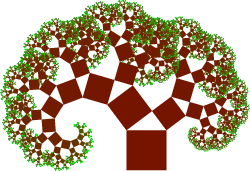

In [2]:
%%asy
size(250);

real a=3;
real b=4;
real c=hypot(a,b);

transform ta=shift(c,c)*rotate(-aCos(a/c))*scale(a/c)*shift(-c);
transform tb=shift(0,c)*rotate(aCos(b/c))*scale(b/c);

picture Pythagorean(int n) {
  picture pic;
  fill(pic,scale(c)*unitsquare,1/(n+1)*green+n/(n+1)*brown);
  if(n == 0) return pic;
  picture branch=Pythagorean(--n);
  add(pic,ta*branch);
  add(pic,tb*branch);
  return pic;
}

add(Pythagorean(12));

In [284]:
drawingspec2 = '''
import math; import graph; import geometry;
size(12cm);
real theta = {theta};
real thetaRad={theta}*pi/180; real force={force};
pair xx = (force*cos(thetaRad), 0);
pair yy = (force*cos(thetaRad),force*sin(thetaRad));

draw("$F_x$",(0,0)--xx,dashed,Arrow);
draw("$F_y$",xx--yy, dashed,Arrow);
draw("$F$",(0,0)--yy,black,Arrow);
draw("$\\theta$", arc( (0,0), 20, 0,theta) );
draw ((0,0)--(100,100), invisible);
'''

In [285]:
#Interactive force triangle - https://learn2.open.ac.uk/mod/oucontent/view.php?id=1226790&section=2.2.1 
from ipywidgets import interact
@interact(force=(35,100,5),   theta=(5,85,5))
def asym_demo(force,theta=25):
    global fig
    fig = drawingspec2.format(force=force,theta=theta)
    fig=%asy -v fig
    return fig 

A Jupyter Widget